# I. Work with LIST
* array-of-arrays can be used as index
* list-of-arrays can not be used as index, but list-of-arrays is more convenient for insert, append new elements
## 1. Use list.insert instead np.insert:
* dont use np.append array since it will make copy whole array to new one, but convert to list for appending, after that convert again to numpy array, mean dont use np.insert but use list.insert

In [2]:
import numpy as np
# array of arrays of diffrence sizes
a = np.array([np.array([1,2]), np.array([3,4,5]), np.array([3,4,5, 6])])
print(a)

[array([1, 2]) array([3, 4, 5]) array([3, 4, 5, 6])]


C:\DevProgram\miniconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


## insert vs append 1 element
* Insert 1 elem at position i
* append 1 elem x at the end of list  <br>
a[len(a):] = [x]

In [56]:
b=np.array([1,0])
c = list(a)
c.insert(1,b)
c.append(b)
print(c)

[array([1, 2]), array([1, 0]), array([3, 4, 5]), array([3, 4, 5, 6]), array([1, 0])]


In [61]:
# array of arrays of the same sizes
a = np.array([np.array([1,2]), np.array([3,4]), np.array([5, 6])])
print(a)

[[1 2]
 [3 4]
 [5 6]]


In [67]:
b = []
a = [1,2]
c = np.array([3,4])
b.append(a)
b.append(c)
print(b)

[[1, 2], array([3, 4])]


## insert vs append sublist in to list
* Insert sublist into a list at position i
* append sublist into a list at the end of list of list

In [ ]:
# Insert sublist into a list at position i
a[i:i] = sublist

# append sublist into a list at the end of list of list
a[len(a):] = sublist         # or a[len(a):len(a)] = sublist
a.extend(sublist)

## Extract a not in b
use extraction of 2 list 

In [53]:
a = [0,2,3]
b = [0,2,5,6]
c = list(set(b)-set(a))
d = set(a)-set(b)
print(c)
print(d)

[5, 6]
{3}


In [59]:
a = np.array([0,2,3])
b = np.array([0,2,5,6])
np.array(list(set(b)-set(a)))

array([5, 6])

In [60]:
a[-1]

3

## NOTE:
1. set dtype when creat numpy "array of strings" to avoid truncation of strings
Solve this by set "dtype='U256'" when create numpy array
https://www.geeksforgeeks.org/modify-numpy-array-to-store-an-arbitrary-length-string/

2. use np.copy to avoid changing value of original array

In [49]:
a = [None]*4
a[0] = [1, 2]
print(a)

[[1, 2], None, None, None]


## slicing list
https://stackoverflow.com/questions/646644/how-to-get-last-items-of-a-list-in-python
* get n begin elements: list[:n]
* get n last elements: list[-n:]

In [6]:
a = [1,3,4,4]
a[-2:]

[4, 4]

## Check empty list

In [4]:
x=[]
print(not(list(x)) )

x=np.array([3,4])
print( not(list(x)) )

True
False


[Return 2 lists from list comprehension](https://stackoverflow.com/questions/10479319/possible-to-return-two-lists-from-a-list-comprehension)

In [3]:
rr,tt = zip(* [(i*10, i*12) for i in range(4)] )
rr

(0, 12, 24, 36)

# II. Work with Numpy arrays
## "(*args, **kwargs)": arguments and Keyword arguments
https://www.digitalocean.com/community/tutorials/how-to-use-args-and-kwargs-in-python-3
## convert numpy to list
a.tolist()
## detect empty use for both: list and array
not(list(x))

In [2]:
import numpy as np

a = np.asarray([1, 1, -2])
a/max(abs(a))

array([ 0.5,  0.5, -1. ])

In [3]:
np.linalg .norm(a)

2.449489742783178

## II.1 detect sign change
https://stackoverflow.com/questions/2652368/how-to-detect-a-sign-change-for-elements-in-a-numpy-array

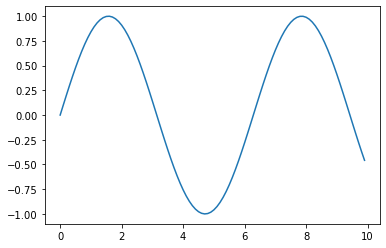

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0,10,0.1)
y=np.sin(x)
plt.plot(x,y)
plt.show()

In [31]:
a = np.gradient(y,x)
# detect sign change
idx = np.where( np.sign(a[:-1]) != np.sign(a[1:]) )[0] + 1
idx

array([16, 48, 79], dtype=int64)

In [2]:
import sys, os, glob
sys.path.append("D:\work\myCodes\code_Python")
import thaTool 
thaTool.detectSignChange(y,x) 

array([16, 48, 79], dtype=int64)

# III. Code in more Pythonic Style
## 1. Use generator (lazy evaluation)
to save memory
https://www.youtube.com/watch?v=bD05uGo_sVI

https://www.programiz.com/python-programming/generator

In [1]:
import sys, os, glob, time, random
sys.path.append("D:\work\myCodes\code_Python")
import thaTool 
import numpy as np
%load_ext memory_profiler

## Generator function

In [16]:
def people_list(num_people):
    result = []
    for i in range(num_people):
        ...something here
        result.append(person)
    return result   # return a list 

def people_generator(num_people):
    for i in range(num_people):
        result[i] = ...something here
        yield result[i] # return generator

SyntaxError: invalid syntax (<ipython-input-16-93c0caaeeb4e>, line 4)

In [3]:
names = ['John', 'Corey', 'Adam', 'Steve', 'Rick', 'Thomas']
majors = ['Math', 'Engineering', 'CompSci', 'Arts', 'Business']

def people_list(num_people):
    result = []
    for i in range(num_people):
        person = {
                    'id': i,
                    'name': random.choice(names),
                    'major': random.choice(majors)
                }
        result.append(person)
    return result

def people_generator(num_people):
    for i in range(num_people):
        person = {
                    'id': i,
                    'name': random.choice(names),
                    'major': random.choice(majors)
                }
        yield person

In [4]:
print( 'Memory (Before): {}Mb'.format(thaTool.memory_usage_psutil()) )

t1 = time.process_time()
people = people_list(1000000)
t2 = time.process_time()

# t1 = time.process_time()
# people = people_generator(1000000)
# t2 = time.process_time()

print( 'Memory (After) : {}Mb'.format(thaTool.memory_usage_psutil()) )
print( 'Took {} Seconds'.format(t2-t1) )

Memory (Before): 83.8125Mb
Memory (After) : 370.68359375Mb
Took 1.609375 Seconds


In [17]:
%memit
people = people_list(1000000)
print(people)

peak memory: 165.57 MiB, increment: 0.48 MiB


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [18]:
%memit
people = people_generator(1000000)
print(people)

peak memory: 366.64 MiB, increment: 0.00 MiB
<generator object people_generator at 0x000002201EF22E48>


## Generator list
- comprehansion of list --> list
- comprehansion of tuple --> generator

In [12]:
my_nums = [x*x for x in [1,2,3,4,5]]
print (my_nums) 

[1, 4, 9, 16, 25]


In [28]:
my_gen = (x*x for x in [1,2,3,4,5])
print (my_nums) 

<generator object <genexpr> at 0x000002201EF43048>


## extract element from generator

In [22]:
print (list(my_nums) )

[1, 4, 9, 16, 25]


In [24]:
my_gen = (x*x for x in [1,2,3,4,5])
for num in my_gen:           #for i,num in enumerate(my_gen):
    print(num)

1
4
9
16
25


## get an element from generator
NOTE: GEN just can be used ONE-TIME, so this way can not be put in a loop

In [56]:
import itertools
my_gen = (x*x for x in [1,2,3,4,5])   
next(itertools.islice(my_gen, 4, None)) 

25

In [69]:
my_gen = (x*x for x in [1,2,3,4,5])
gen1 = my_gen
[elem for i,elem in enumerate(my_gen) if i==4][0]

25

In [68]:
[elem for i,elem in enumerate(gen1) if i==4][0]

IndexError: list index out of range

In [71]:
list(gen1)

[]

## 2 generators at the same time
- use zip(gen1,gen2)
- NOTE: this work even different sizes

In [6]:
gen1 = (x for x in [1,2,3,4,5,6])
gen2 = (x*x for x in [1,2,3,4,5,6,7])
for num1,num2 in zip(gen1,gen2):           #for i,num in enumerate(my_gen):
    print(num1,num2)

1 1
2 4
3 9
4 16
5 25
6 36


## III.2 Decorator
https://www.programiz.com/python-programming/decorator

## III.3 Tricks

In [ ]:
if condition: 
    x=1
else:
    x=0
    
## USE
x=1 if condition else x=0

In [ ]:
fileID = open(fileName,'r')
C = fileID.read().splitlines()              # a list of strings
fileID.close() 

## USE:
with open(fileName,'r') as fileID:
    C = fileID.read().splitlines() 

In [ ]:
## Unpack
a,b,*c,d = [2,3,5,4,4,6,7]

## str.format() function
https://www.geeksforgeeks.org/python-format-function/

In [2]:
## Single Formatter: { }.format(value)
# using format option in a simple string
print ("{}, A computer science portal for geeks.".format("GeeksforGeeks"))

# value stored in a variable
str = "This article is written in {}"
print (str.format("Python"))
 
# formatting a string using a numeric constant
print ("Hello, I am {} years old !".format(18))

GeeksforGeeks, A computer science portal for geeks.
This article is written in Python
Hello, I am 18 years old !


In [5]:
## Multiple Formatters: { }{ }.format(value1, value2)
my_string = "{}, is a {} science portal for {}"
print (my_string.format("GeeksforGeeks", "computer", "geeks"))

GeeksforGeeks, is a computer science portal for geeks


In [6]:
# Reverse the index numbers with the parameters of the placeholders
print("{1} love {0}!!".format("GeeksforGeeks",
                                    "Geeks"))

Geeks love GeeksforGeeks!!


## Type Specifying :
More parameters can be included within the curly braces of our syntax. Use the format code syntax {field_name: conversion}, where field_name specifies the index number of the argument to the str.format() method, and conversion refers to the conversion code of the data type.

In [8]:
## {field_name:conversion}.format(value)
print("The temperature today is {0:.2f} degrees outside !".format(35.567))

The temperature today is 35.57 degrees outside !


In [9]:
print("The temperature today is {:.2f} degrees outside !".format(35.567))

The temperature today is 35.57 degrees outside !


In [11]:
i=2
print("{:6d} {:6d} {:6d} {:6d}" .format(i, i ** 2, i ** 3, i ** 4))

     2      4      8     16
